In [ ]:
import pandas as pd
import numpy as  np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
data = pd.read_csv('/content/gizi_fix.xlsx - gizi_fix.csv')
data.head()

,Energi,Protein,Lemak,Karbohidrat,Kalsium,Besi,Air,Nama Pangan,Gambar
0,360.0,6.8,0.7,78.9,6.0,0.8,13.0,Beras Giling,https://images.pexels.com/photos/4187621/pexel...
1,178.0,2.1,0.1,40.6,5.0,0.5,57.0,Beras Giling masak (nasi),https://e0.pxfuel.com/wallpapers/769/103/deskt...
2,356.0,7.0,0.7,78.0,10.0,0.8,13.0,Beras Ketan Hitam,https://img.herstory.co.id/articles/archive_20...
3,181.0,4.0,1.2,37.3,9.0,1.7,56.9,Beras Ketan Hitam kukus,https://img.freepik.com/free-photo/purple-rice...
4,166.0,3.8,1.0,34.4,8.0,1.6,50.2,Beras Ketan Hitam tape,https://images.tokopedia.net/img/cache/500-squ...


In [ ]:
data.rename(columns=({'Nama Pangan':'Label'}), inplace=True)
data.head(5)

,Energi,Protein,Lemak,Karbohidrat,Kalsium,Besi,Air,Label,Gambar
0,360.0,6.8,0.7,78.9,6.0,0.8,13.0,Beras Giling,https://images.pexels.com/photos/4187621/pexel...
1,178.0,2.1,0.1,40.6,5.0,0.5,57.0,Beras Giling masak (nasi),https://e0.pxfuel.com/wallpapers/769/103/deskt...
2,356.0,7.0,0.7,78.0,10.0,0.8,13.0,Beras Ketan Hitam,https://img.herstory.co.id/articles/archive_20...
3,181.0,4.0,1.2,37.3,9.0,1.7,56.9,Beras Ketan Hitam kukus,https://img.freepik.com/free-photo/purple-rice...
4,166.0,3.8,1.0,34.4,8.0,1.6,50.2,Beras Ketan Hitam tape,https://images.tokopedia.net/img/cache/500-squ...


In [ ]:
data.describe()

,Energi,Protein,Lemak,Karbohidrat,Kalsium,Besi,Air
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000
mean,199.061296,9.736039,7.764204,24.214597,145.605754,3.352162,54.395397
std,168.259577,11.814281,14.818726,30.467700,363.165078,5.815624,32.341582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,1.700000,0.400000,4.500000,16.000000,0.800000,15.100000
50%,141.000000,4.700000,1.700000,13.000000,50.000000,1.800000,66.100000
75%,329.000000,14.500000,8.050000,34.750000,135.000000,3.700000,82.000000
max,940.000000,83.000000,100.000000,647.000000,4608.000000,96.400000,135.000000


In [ ]:
"""
dataset=data.copy()
columns=['Energi', 'Protein', 'Lemak',
         'Karbohidrat', 'Kalsium', 'Besi',
         'Air', 'Label', 'Gambar'
         ]
dataset=dataset[columns]
"""

"\ndataset=data.copy()\ncolumns=['Energi', 'Protein', 'Lemak',\n         'Karbohidrat', 'Kalsium', 'Besi',\n         'Air', 'Label', 'Gambar'\n         ]\ndataset=dataset[columns]\n"

In [ ]:
kolom_nutrisi = ['Energi', 'Protein', 'Lemak',
         'Karbohidrat', 'Kalsium', 'Besi', 'Air'
         ]
data_nutrisi = data[kolom_nutrisi]

In [ ]:
data_nutrisi = data_nutrisi.fillna(0)  # Replace missing values with 0 or appropriate values
scaler = MinMaxScaler()
recipe_data_scaled = scaler.fit_transform(data_nutrisi)  # Scale the features to [0, 1]

# Split the dataset into training and validation sets
train_data, val_data = train_test_split(recipe_data_scaled, test_size=0.3, random_state=42)

# Build the recommendation model
input_dim = recipe_data_scaled.shape[1]

model=tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding='causal',activation='relu',input_shape=[None, 1]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.Dense(30, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1),
    ])

model.compile(loss='mean_squared_error', optimizer=Adam())

# Train the model
history = model.fit(train_data, train_data, epochs=20, batch_size=32, validation_data=(val_data, val_data))

Epoch 1/20
37/37 [==============================] - 7s 46ms/step - loss: 0.0368 - val_loss: 0.0349
Epoch 2/20
37/37 [==============================] - 1s 21ms/step - loss: 0.0208 - val_loss: 0.0102
Epoch 3/20
37/37 [==============================] - 1s 29ms/step - loss: 0.0080 - val_loss: 0.0061
Epoch 4/20
37/37 [==============================] - 1s 29ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 5/20
37/37 [==============================] - 1s 25ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 6/20
37/37 [==============================] - 1s 26ms/step - loss: 7.5967e-04 - val_loss: 5.1174e-04
Epoch 7/20
37/37 [==============================] - 1s 32ms/step - loss: 3.9495e-04 - val_loss: 3.2949e-04
Epoch 8/20
37/37 [==============================] - 1s 36ms/step - loss: 2.5006e-04 - val_loss: 2.0499e-04
Epoch 9/20
37/37 [==============================] - 1s 39ms/step - loss: 1.6619e-04 - val_loss: 1.6823e-04
Epoch 10/20
37/37 [==============================] - 1s 39ms/step - loss: 1.2

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

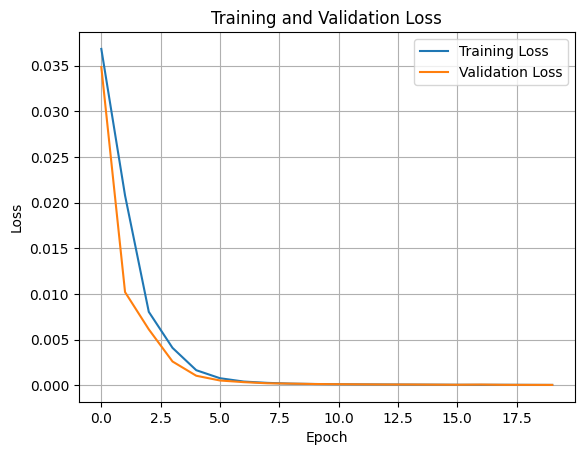

In [ ]:
plot_loss(history)

In [ ]:
# Generate recommendations for a given recipe
data_nutrisi  = np.array([[178.0, 2.1, 0.1, 40.6, 5.0, 0.5, 57.0]])  # Replace with your input recipe

# Scale the input recipe using the same scaler
input_recipe_scaled = scaler.transform(data_nutrisi)

# Calculate similarity scores
similarity_scores = cosine_similarity(input_recipe_scaled, recipe_data_scaled)

# Get recommended recipe indices
top_indices = np.argsort(similarity_scores, axis=1)[0][::-1][:10]  # Get top 10 indices

# Filter out irrelevant columns
relevant_columns = ['Energi', 'Protein', 'Lemak',
         'Karbohidrat', 'Kalsium', 'Besi', 'Air', 'Label', 'Gambar'
         ]
recommendations = data.iloc[top_indices][relevant_columns]

recommendations.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Energi,Protein,Lemak,Karbohidrat,Kalsium,Besi,Air,Label,Gambar
1,178.0,2.1,0.1,40.6,5.0,0.5,57.0,Beras Giling masak (nasi),https://e0.pxfuel.com/wallpapers/769/103/deskt...
631,180.0,3.0,0.3,39.8,25.0,0.4,56.7,Nasi,https://asset.kompas.com/crops/V8z5REsWvqpu4Cx...
812,169.0,1.4,0.3,40.2,21.0,0.8,57.4,Tapai singkong,https://res.cloudinary.com/dk0z4ums3/image/upl...
648,172.0,3.0,0.5,37.5,6.0,0.5,58.9,Tapai ketan putih,https://assets.pikiran-rakyat.com/crop/0x0:0x0...
8,172.0,3.0,0.5,37.5,6.0,0.5,58.9,Beras Ketan Putih tape,https://awsimages.detik.net.id/community/media...


In [ ]:
data[data['Label'] == 'Beras Giling masak (nasi) ']

,Energi,Protein,Lemak,Karbohidrat,Kalsium,Besi,Air,Label,Gambar
1,178.0,2.1,0.1,40.6,5.0,0.5,57.0,Beras Giling masak (nasi),https://e0.pxfuel.com/wallpapers/769/103/deskt...


In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
